In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
from scipy.optimize import curve_fit
from scipy import special
import glob
import os
plt.style.use(['science','notebook','grid'])
import matplotlib.ticker as ticker

In [2]:
#Lumière Blanche
lum = pd.read_csv("1re séance\sans_echantillon_lum_fermer.txt",delimiter = '\t',skiprows=17,names = ['x','y'],decimal=',')
lum['x'] = lum['x'].apply(lambda x: x.replace(',','.'))
lum.drop(3648,inplace=True)
lum['y'] = lum['y'] / 350 #temps d'intégration
lum['x'] = lum['x'].apply(lambda x: float(x))

In [3]:
#Données Or
Au = pd.read_csv('1re séance/Au.txt',delimiter='\t',skiprows=17,names=['x','y'],decimal=',')
Au['x'] = Au['x'].apply(lambda x: x.replace(',','.'))
Au.drop(3648,inplace=True)
Au['y'] = Au['y'] / 350 #temps d'intégration
Au['x'] = Au['x'].apply(lambda x: float(x))

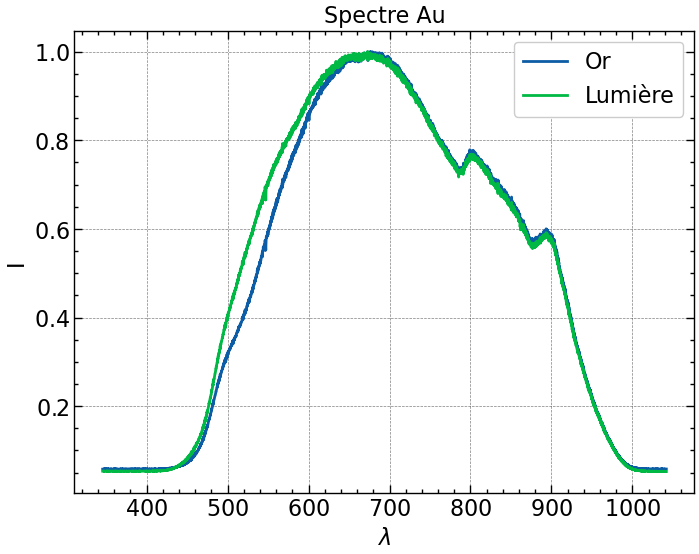

In [4]:
plt.plot(Au['x'],Au['y']/max(Au['y']),label='Or')
plt.plot(lum['x'],lum['y']/max(lum['y']),label='Lumière')
plt.xlabel('$\lambda$')
plt.ylabel('I')
plt.title('Spectre Au')
plt.legend()

# Transmittance Au

In [5]:
#Dataframe de transmittance de l'Or et longeur d'onde de la fréquence de résonnance
Au_T = pd.DataFrame(list(zip(Au['x'],Au['y']/lum['y'])),columns=['x','y'])
lam_freq = Au_T[Au_T['y'] == min(Au_T['y'])]['x']

In [24]:
lam_freq

822    521.15
Name: x, dtype: float64

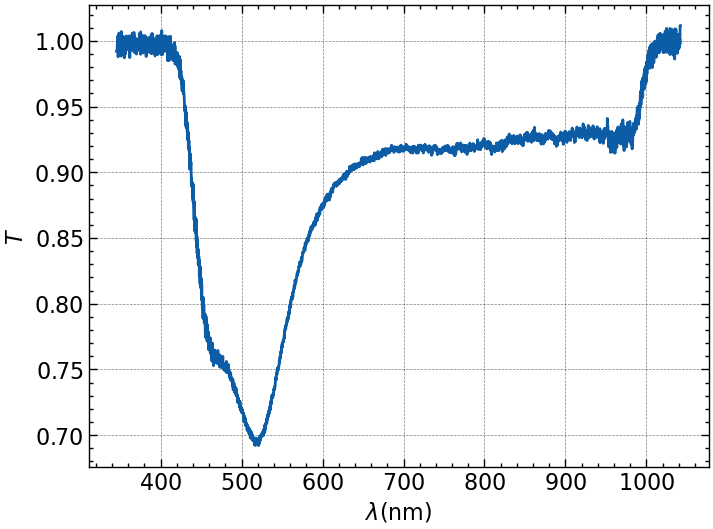

In [6]:
plt.plot(Au_T['x'],Au_T['y'])
#plt.title('Transmittance du Au')
plt.xlabel('$\lambda$(nm)')
plt.ylabel('$T$')
plt.savefig('Or')

Fréquence plasma :

$$ \omega_{p} = \sqrt{\frac{ne^{2}}{m \epsilon_{0}}} $$
<br>
<br>
S'en suit que :
$$ n = \frac{\omega_{p}^{2} * m \epsilon_{0}}{e^{2}} $$

- n = densité volumique
- e = charge élémentaire  = 1.602 176 634 x 10$^{−19}$ C
- m = masse de l'électron = 9.1094 x 10$^{-31}$ Kg
- $\epsilon_{0}$ = constante diélectrique = 8.854 187 x 10$^{−12}$ F m$^{−1}$

On a trouver que $\lambda_{creux}$ $\approx$ 518 nm
<br>
<br>
On sait que $\omega$ = $\frac{c}{\lambda_{creux}}$
<br>
<br>
c = 299 792 458 m/s
<br>
$$n = \frac{n_{e}}{V}$$

In [48]:
e = 1.602176634 * 10**-19
m = 9.1094 * 10**-31
e0 = 8.854187 * 10**-12
lam = np.array(lam_freq)*10**-9
c = 299792458
w = c/lam
n = (w**2 * m * e0)/(e**2)
print("Densité Volumique :\n {:.3E}".format(n[0]))

Densité Volumique :
 1.040E+26


In [51]:
#Cylindre illuminé
r=0.8/2
rb = r/100
l = 0.15/100
A = np.pi*rb**2
V = A * l
ne = V*n

In [52]:
print("Densité d'électrons = {}".format(ne[0]))

Densité d'électrons = 7.839614567985206e+18
